# Capstone - The Battle of the Neighborhoods (Week 2)

## Dog Friendly Neighborhoods in Seattle

### Table of Contents

1. [Introduction](#1.-Introduction)
2. [Data](#2.-Data)
3. [Methodology](#3.-Methodology)
4. [Analysis](#4.-Analysis)
5. [Results](#5.-Results)
6. [Conclusion](#6.-Conclusion)

## 1. Introduction

### 1.1 Business Problem

A company that specializes in relocation assistance needs information about neighborhoods in the Seattle area with Pet Services, Pet Stores, Dog Runs and Veterinarians. Current information about dog friendly neighborhoods in the Seattle area does not exist with all these attributes. This company wants to provide dog owners with a more holistic view of dog friendly cities starting with Seattle. 

### 1.2 Background

A company who specializes in relocation assistance for executive level managers in the Seattle area wants to share information about dog friendly neighborhoods in the city. A dog friendly neighborhood should consist of Pet Services, Pet Stores, Dog Runs and Veterinarians. The purpose of this project is to identify which neighborhoods in Seattle make for the best dog friendly places to relocate.   

### 1.3 Justificiation

It is important to provide reliable information to help people with relocation questions and concerns. A major concern for a dog owner that is relocating to a city is the safety and care of their furry friend. Information about which neighborhoods are dog friendly can save time and reduce the stress of having to relocate.

### 1.4 Interest

Relocation assistance companies would be interested in this project because it provides valuable information about dog friendly neighborhoods which are import to people with dogs. This information can differentiate the competition and increase customer satisfaction for relocation assistance companies. Dog companies would find this project of interest as well because they could use it to identify dog friendly neighborhoods to promote their products and services.

## 2. Data

### 2.1 Description

The location data for the neighborhoods for this project comes from Wikipedia which contains a table that consist of 127 neighborhoods in the city of Seattle. HTML data from the Wikipedia page will be used to create the neighborhood table. The geospatial data for the latitude and longitude of the neighborhoods will come from the geopy python library or a CSV file. The location data for Pet Stores, Veterinarians, Dog Parks and Pet Services will come from Four Square.

### 2.2 Use

The list of neighborhoods for Seattle, Washington will be scraped from the Wikipedia page listed under data sources using python libraries which will include the use of Beautiful Soup to parse the HTML into a Pandas dataframe. Information and location data about Pet Services, Pet Stores, Dog Runs and Veterinarians will come from Four Square and be used to cluster these attributes according to the approximate radius by distance from each other. An ideal dog friendly neighborhood would have all four of the attributes which are Pet Stores, Veterinarians, Dog Parks and Pet Services within a neighborhood in Seattle. A list of the top 10 neighborhoods will be identified from the greatest number of attributes to lowest to provide a holistic view using folium to create a map visualization. Matplotlib python library will be used to create graphs to show quantity of attributes for each of the top 10 neighborhoods.

### 2.3 Data Sources

### Wikipedia

The first set of data will be a list of neighborhoods in Seattle that will need to use to get the latitude and longitude.

In [2]:
# import wikipedia url
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle').text

# import beautifulsoup library
from bs4 import BeautifulSoup

# parse HTML into BeautifulSoup tree format
soup = BeautifulSoup(website_url,'lxml')

# display HTML from URL
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of neighborhoods in Seattle - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_neighborhoods_in_Seattle","wgTitle":"List of neighborhoods in Seattle","wgCurRevisionId":914042638,"wgRevisionId":914042638,"wgArticleId":750943,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: deprecated parameters","Webarchive template wayback links","All articles with dead external links","Articles with dead external links from June 2016","Articles with dead external links from February 2018","CS1 errors: markup","All articles with unsourced statements","Articles with unsourced statements from October 2007","

In [3]:
# use 'find_all' to get all instances of 'table' tag in HTML
Neighborhood_table = soup.find('table',{'class':'wikitable sortable'})
Neighborhood_table

<table class="wikitable sortable" style="width:98%">
<tbody><tr>
<th width="2%">
</th>
<th width="12%">Neighborhood name
</th>
<th width="12%">Within larger district
</th>
<th width="7%">Annexed<sup class="reference" id="cite_ref-41"><a href="#cite_note-41">[41]</a></sup>
</th>
<th class="unsortable">Locator map
</th>
<th class="unsortable">Street map
</th>
<th class="unsortable">Image
</th>
<th class="unsortable">Notes
</th></tr>
<tr>
<th><small>1</small>
</th>
<td><b>North Seattle</b>
</td>
<td>Seattle
</td>
<td>Various
</td>
<td style="text-align:center;"><a class="image" href="/wiki/File:Norda_Seatlo.jpg"><img alt="Norda Seatlo.jpg" data-file-height="599" data-file-width="338" decoding="async" height="142" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Norda_Seatlo.jpg/80px-Norda_Seatlo.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Norda_Seatlo.jpg/120px-Norda_Seatlo.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Norda_Seatlo.jpg/160px-No

In [4]:
# find all links 'a'
links = Neighborhood_table.findAll('a')
links

[<a href="#cite_note-41">[41]</a>,
 <a class="image" href="/wiki/File:Norda_Seatlo.jpg"><img alt="Norda Seatlo.jpg" data-file-height="599" data-file-width="338" decoding="async" height="142" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Norda_Seatlo.jpg/80px-Norda_Seatlo.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Norda_Seatlo.jpg/120px-Norda_Seatlo.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Norda_Seatlo.jpg/160px-Norda_Seatlo.jpg 2x" width="80"/></a>,
 <a class="image" href="/wiki/File:Building_II_on_UW_campus.jpg"><img alt="Building II on UW campus.jpg" data-file-height="1600" data-file-width="1200" decoding="async" height="200" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Building_II_on_UW_campus.jpg/150px-Building_II_on_UW_campus.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Building_II_on_UW_campus.jpg/225px-Building_II_on_UW_campus.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Buildi

In [5]:
# get all neighborhoods in Seattle from wikipedia data
Neighborhood = []
for link in links:
    Neighborhood.append(link.get('title'))
    
print(Neighborhood)

[None, None, None, 'Lake Washington Ship Canal', None, 'Broadview, Seattle', None, None, None, None, None, None, 'Bitter Lake, Seattle', None, None, None, None, None, 'North Beach, Seattle (page does not exist)', 'Blue Ridge, Seattle', None, None, None, None, None, 'Crown Hill, Seattle', None, None, None, None, None, None, None, None, 'Greenwood, Seattle', None, None, None, None, None, None, None, 'Northgate, Seattle', None, None, None, None, None, None, 'Haller Lake, Seattle', None, None, None, None, None, None, 'Pinehurst, Seattle', None, None, None, None, None, 'Licton Springs, Seattle', None, None, None, None, None, 'Maple Leaf, Seattle', None, None, None, None, None, 'Lake City, Seattle', None, None, None, None, None, None, 'Wikipedia:Citation needed', 'Wikipedia:Citation needed', 'Cedar Park, Seattle', None, None, None, None, None, 'Matthews Beach, Seattle', None, None, None, None, None, None, 'Meadowbrook, Seattle', None, None, None, None, None, 'Olympic Hills, Seattle', None, N

### Pandas Dataframe Neighborhood

The dataframe will consist of 1 column with a list of neighborhoods in Seattle.

In [6]:
# create dataframe from table data and assign neighborhood column
import pandas as pd
df = pd.DataFrame()
df['Neighborhood'] = Neighborhood

df

,Neighborhood
0,None
1,None
2,None
3,Lake Washington Ship Canal
4,None
5,"Broadview, Seattle"
6,None
7,None
8,None
9,None


### Clean Up Neighborhood Dataframe

Prepare the neighbhorhood data for use in geopy to extract the latitude and longitude data. The final dataframe will have the neighborhood and city of Seattle separated with a comma after the cleanup. 

In [7]:
# remove 'None' from Neighborhood column and reset index
df = df.loc[~df['Neighborhood'].isin([None])]
df.reset_index(drop=True, inplace=True)
df

,Neighborhood
0,Lake Washington Ship Canal
1,"Broadview, Seattle"
2,"Bitter Lake, Seattle"
3,"North Beach, Seattle (page does not exist)"
4,"Blue Ridge, Seattle"
5,"Crown Hill, Seattle"
6,"Greenwood, Seattle"
7,"Northgate, Seattle"
8,"Haller Lake, Seattle"
9,"Pinehurst, Seattle"


Keep all neighborhoods with the City of Seattle and remove all unecessary characters. 

In [9]:
# keep neighborhoods with Seattle and reomve characters 
df = df.loc[df['Neighborhood'].str.contains('Seattle')]
df["Neighborhood"] = df["Neighborhood"].str.replace("page does not exist","")
df["Neighborhood"] = df["Neighborhood"].str.replace("(","")
df["Neighborhood"] = df["Neighborhood"].str.replace(")","")
df.drop_duplicates(subset ="Neighborhood", keep = False, inplace = True) 
df.reset_index(drop=True, inplace=True)
df

,Neighborhood
0,"Broadview, Seattle"
1,"Bitter Lake, Seattle"
2,"North Beach, Seattle"
3,"Blue Ridge, Seattle"
4,"Crown Hill, Seattle"
5,"Greenwood, Seattle"
6,"Northgate, Seattle"
7,"Haller Lake, Seattle"
8,"Pinehurst, Seattle"
9,"Licton Springs, Seattle"


### Geopy

Will use the geopy library to get the Latitude and Longitude data for each neighborhood using our neighborhood dataframe.

In [10]:
# install geopy library and import Nominatim and RateLimiter
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [12]:
# import Nominatim and RateLimiter
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# loop through neighborhoods and get latitude and longitude
geolocator = Nominatim(user_agent="wa_explorer",format_string="%s, Seattle WA")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# get latitude and longitude
df['Location'] = df['Neighborhood'].apply(geocode)
df['Latitude'] = df['Location'].apply(lambda location: location.latitude if location is not None else None)
df['Longitude'] = df['Location'].apply(lambda location: location.longitude if location is not None else None)

df

,Neighborhood,Location,Latitude,Longitude
0,"Broadview, Seattle","(Broadview, Seattle, King County, Washington, ...",47.722320,-122.360407
1,"Bitter Lake, Seattle","(Bitter Lake, King County, Washington, 98133, ...",47.726236,-122.348764
2,"North Beach, Seattle","(North Beach, King County, Washington, 98117, ...",47.696210,-122.392362
3,"Blue Ridge, Seattle","(Blue Ridge, King County, Washington, 98117, U...",47.701487,-122.375407
4,"Crown Hill, Seattle","(Crown Hill, King County, Washington, 98117, U...",47.694715,-122.371459
5,"Greenwood, Seattle","(Greenwood, Seattle, King County, Washington, ...",47.690981,-122.354877
6,"Northgate, Seattle","(Northgate, Seattle, King County, Washington, ...",47.713153,-122.321231
7,"Haller Lake, Seattle","(Haller Lake, Seattle, King County, Washington...",47.720781,-122.330424
8,"Pinehurst, Seattle","(11525, Pinehurst P-Patch, Northgate, Seattle,...",47.712877,-122.315542
9,"Licton Springs, Seattle","(Licton Springs, Maple Leaf, Seattle, King Cou...",47.695534,-122.337623


In [13]:
# delete location column
del df['Location']
df

,Neighborhood,Latitude,Longitude
0,"Broadview, Seattle",47.722320,-122.360407
1,"Bitter Lake, Seattle",47.726236,-122.348764
2,"North Beach, Seattle",47.696210,-122.392362
3,"Blue Ridge, Seattle",47.701487,-122.375407
4,"Crown Hill, Seattle",47.694715,-122.371459
5,"Greenwood, Seattle",47.690981,-122.354877
6,"Northgate, Seattle",47.713153,-122.321231
7,"Haller Lake, Seattle",47.720781,-122.330424
8,"Pinehurst, Seattle",47.712877,-122.315542
9,"Licton Springs, Seattle",47.695534,-122.337623


### Dataframe Neighborhood, Latitude and Longitude

Will use the dataframe with Neighborhood, Latitude and Longitude columns to mark our neighbhorhoods on a map of Seattle to identify where a person with a canine compnanion could relocate.

In [14]:
# drop records with NA from dataframe and reset index
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Neighborhood,Latitude,Longitude
0,"Broadview, Seattle",47.722320,-122.360407
1,"Bitter Lake, Seattle",47.726236,-122.348764
2,"North Beach, Seattle",47.696210,-122.392362
3,"Blue Ridge, Seattle",47.701487,-122.375407
4,"Crown Hill, Seattle",47.694715,-122.371459
5,"Greenwood, Seattle",47.690981,-122.354877
6,"Northgate, Seattle",47.713153,-122.321231
7,"Haller Lake, Seattle",47.720781,-122.330424
8,"Pinehurst, Seattle",47.712877,-122.315542
9,"Licton Springs, Seattle",47.695534,-122.337623


### Seattle Coordinates

Will get the latitude and longitude for Seattle, WA and pass the location to our folium map to setup up our intial map display of Seattle.

In [15]:
# get coordinates for Seattle 'WA' country code
address = 'Seattle, WA'

geolocator = Nominatim(user_agent="wa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Seattle are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Seattle are 47.6038321, -122.3300624.


### Folium

Will use folium to display our neighborhoods on a map to get a visual of our data from the dataframe with our Neighborhood, Latitude, Longitude.

In [16]:
# import libraries and install geopy and folium
import numpy as np # library to handle data in a vectorized manner
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         868 KB

The following NEW packages will be INSTALLED:

    altair:  3.2.0-py36_0 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


altair-3.2.0         | 770 KB    | #################################

### Map of Neighborhoods in Seattle

The map identifies the locations of the neighborhoods from the wikipedia data source.

In [41]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=8,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#000000',
        fill_opacity=.25,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### FourSqaure

Now that we have identified the neighborhoods in Seattle will use the FourSquare API to get data about Pet Stores, Veterinarians, Dog Parks and Pet Services. Will define the top 10 dog-friendly neighborhoods with this information. Will use this information to overlay the locations of each category on the map of Seattle neighbhorhoods to get a quick look at which neighborhoods contain all four of our dog-friendly categories.

In [18]:
# Input credentials for the FourSquare API
CLIENT_ID = '5UUWCBXGXCWLKK1DV1XC0A0M0UK1VZDSX03JH31C2RZWLGEP'
CLIENT_SECRET = '5M14P31NFDCYHEPAASDBJQ0SYSV4HUHMMQFXNEJ2GKLRJURB'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5UUWCBXGXCWLKK1DV1XC0A0M0UK1VZDSX03JH31C2RZWLGEP
CLIENT_SECRET:5M14P31NFDCYHEPAASDBJQ0SYSV4HUHMMQFXNEJ2GKLRJURB


### Pet Service

This function will get all of the nearby venues, latitude, longitude and category name by category ID for Pet Service from FourSquare API.

In [19]:
# limit of number of venues returned by Foursquare API
LIMIT = 999

# Pet Service
categoryId = '5032897c91d4c4b30a586d69'

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    pet_service_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        pet_service = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        pet_service_result = requests.get(pet_service).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        pet_service_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in pet_service_result])

    pet_service_venue = pd.DataFrame([item for pet_service_list in pet_service_list for item in pet_service_list])
    pet_service_venue.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(pet_service_venue)

In [20]:
# get neaby venues for all neighborhoods from the dataframe
pet_service_df = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Broadview, Seattle
Bitter Lake, Seattle
North Beach, Seattle 
Blue Ridge, Seattle
Crown Hill, Seattle
Greenwood, Seattle
Northgate, Seattle
Haller Lake, Seattle
Pinehurst, Seattle
Licton Springs, Seattle
Maple Leaf, Seattle
Lake City, Seattle
Cedar Park, Seattle
Matthews Beach, Seattle
Meadowbrook, Seattle
Olympic Hills, Seattle
Victory Heights, Seattle
Wedgwood, Seattle
View Ridge, Seattle
Sand Point, Seattle
Roosevelt, Seattle
Ravenna, Seattle
Bryant, Seattle
Windermere, Seattle
Hawthorne Hills, Seattle
Laurelhurst, Seattle
University District, Seattle
University Village, Seattle
Wallingford, Seattle
Meridian, Seattle
Northlake, Seattle
Green Lake, Seattle
Fremont, Seattle
Phinney Ridge, Seattle
Ballard, Seattle
West Woodland, Seattle
Whittier Heights, Seattle
Adams, Seattle
Sunset Hill, Seattle
Loyal Heights, Seattle
Magnolia, Seattle
Lawton Park, Seattle
Briarcliff, Seattle
Southeast Magnolia, Seattle
Interbay, Seattle
Queen Anne, Seattle
North Queen Anne, Seattle 
East Queen Anne,

Pet Service locations in nearby neighborhoods in Seattle.

In [33]:
# prints the record size of rows and columns to return output for pet service venues
print(pet_service_df.shape)
pet_service_df

(74, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bitter Lake, Seattle",47.726236,-122.348764,Banfield Pet Hospital,47.724264,-122.343051,Pet Service
1,"Bitter Lake, Seattle",47.726236,-122.348764,PetSmart,47.724262,-122.343035,Pet Service
2,"Blue Ridge, Seattle",47.701487,-122.375407,Crown Hill Walk,47.698297,-122.375948,Pet Service
3,"Crown Hill, Seattle",47.694715,-122.371459,Petco,47.693802,-122.375893,Pet Service
4,"Crown Hill, Seattle",47.694715,-122.371459,Rocket Dog,47.695282,-122.371681,Pet Service
5,"Crown Hill, Seattle",47.694715,-122.371459,VCA Crown Hill Animal Hospital,47.695877,-122.374375,Pet Service
6,"Crown Hill, Seattle",47.694715,-122.371459,Crown Hill Walk,47.691393,-122.367644,Pet Service
7,"Northgate, Seattle",47.713153,-122.321231,Great Dog,47.711213,-122.317965,Pet Service
8,"Pinehurst, Seattle",47.712877,-122.315542,Great Dog,47.711213,-122.317965,Pet Service
9,"Maple Leaf, Seattle",47.693987,-122.322905,Hawk Dawg Hot Dog,47.693288,-122.327051,Pet Service


In [36]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(pet_service_df['Venue Latitude'], pet_service_df['Venue Longitude'], pet_service_df['Venue Category']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#f39c12',
        fill_opacity=.25,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Pet Store

This function will get all of the nearby venues, latitude, longitude and category name by category ID for Pet Store from FourSquare API.

In [22]:
# limit of number of venues returned by Foursquare API
LIMIT = 999

# Pet Store
categoryId = '4bf58dd8d48988d100951735'

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    pet_store_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        pet_store = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        pet_store_result = requests.get(pet_store).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        pet_store_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in pet_store_result])

    pet_store_venue = pd.DataFrame([item for pet_store_list in pet_store_list for item in pet_store_list])
    pet_store_venue.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(pet_store_venue)

In [23]:
# get neaby venues for all neighborhoods from the dataframe
pet_store_df = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Broadview, Seattle
Bitter Lake, Seattle
North Beach, Seattle 
Blue Ridge, Seattle
Crown Hill, Seattle
Greenwood, Seattle
Northgate, Seattle
Haller Lake, Seattle
Pinehurst, Seattle
Licton Springs, Seattle
Maple Leaf, Seattle
Lake City, Seattle
Cedar Park, Seattle
Matthews Beach, Seattle
Meadowbrook, Seattle
Olympic Hills, Seattle
Victory Heights, Seattle
Wedgwood, Seattle
View Ridge, Seattle
Sand Point, Seattle
Roosevelt, Seattle
Ravenna, Seattle
Bryant, Seattle
Windermere, Seattle
Hawthorne Hills, Seattle
Laurelhurst, Seattle
University District, Seattle
University Village, Seattle
Wallingford, Seattle
Meridian, Seattle
Northlake, Seattle
Green Lake, Seattle
Fremont, Seattle
Phinney Ridge, Seattle
Ballard, Seattle
West Woodland, Seattle
Whittier Heights, Seattle
Adams, Seattle
Sunset Hill, Seattle
Loyal Heights, Seattle
Magnolia, Seattle
Lawton Park, Seattle
Briarcliff, Seattle
Southeast Magnolia, Seattle
Interbay, Seattle
Queen Anne, Seattle
North Queen Anne, Seattle 
East Queen Anne,

Pet Store locations in nearby neighborhoods in Seattle.

In [32]:
# prints the record size of rows and columns to return output for pet store venues
print(pet_store_df.shape)
pet_store_df

(88, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bitter Lake, Seattle",47.726236,-122.348764,PetSmart,47.724262,-122.343035,Pet Store
1,"Crown Hill, Seattle",47.694715,-122.371459,Petco,47.693802,-122.375893,Pet Store
2,"Crown Hill, Seattle",47.694715,-122.371459,Crown Hill Pet Supply,47.695642,-122.374635,Pet Store
3,"Greenwood, Seattle",47.690981,-122.354877,Mud Bay,47.691635,-122.357623,Pet Store
4,"Northgate, Seattle",47.713153,-122.321231,Great Dog,47.711213,-122.317965,Pet Service
5,"Pinehurst, Seattle",47.712877,-122.315542,Great Dog,47.711213,-122.317965,Pet Service
6,"Maple Leaf, Seattle",47.693987,-122.322905,Mrs Pets,47.690292,-122.322980,Pet Store
7,"Lake City, Seattle",47.719162,-122.295494,The Fish Store,47.717993,-122.295802,Pet Store
8,"Lake City, Seattle",47.719162,-122.295494,Missy's Cat Rescue,47.718188,-122.295508,Pet Store
9,"Roosevelt, Seattle",47.677305,-122.313807,Health Mutt,47.675812,-122.315377,Pet Store


In [38]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(pet_store_df['Venue Latitude'], pet_store_df['Venue Longitude'], pet_store_df['Venue Category']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#9b59b6',
        fill_opacity=.25,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Dog Run

This function will get all of the nearby venues, latitude, longitude and category name by category ID for Dog Run from FourSquare API.

In [25]:
# limit of number of venues returned by Foursquare API
LIMIT = 999

# Dog Run
categoryId = '4bf58dd8d48988d1e5941735'

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    dog_run_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        dog_run = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        dog_run_result = requests.get(dog_run).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        dog_run_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in dog_run_result])

    dog_run_venue = pd.DataFrame([item for dog_run_list in dog_run_list for item in dog_run_list])
    dog_run_venue.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(dog_run_venue)

In [26]:
# get neaby venues for all neighborhoods from the dataframe
dog_run_df = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Broadview, Seattle
Bitter Lake, Seattle
North Beach, Seattle 
Blue Ridge, Seattle
Crown Hill, Seattle
Greenwood, Seattle
Northgate, Seattle
Haller Lake, Seattle
Pinehurst, Seattle
Licton Springs, Seattle
Maple Leaf, Seattle
Lake City, Seattle
Cedar Park, Seattle
Matthews Beach, Seattle
Meadowbrook, Seattle
Olympic Hills, Seattle
Victory Heights, Seattle
Wedgwood, Seattle
View Ridge, Seattle
Sand Point, Seattle
Roosevelt, Seattle
Ravenna, Seattle
Bryant, Seattle
Windermere, Seattle
Hawthorne Hills, Seattle
Laurelhurst, Seattle
University District, Seattle
University Village, Seattle
Wallingford, Seattle
Meridian, Seattle
Northlake, Seattle
Green Lake, Seattle
Fremont, Seattle
Phinney Ridge, Seattle
Ballard, Seattle
West Woodland, Seattle
Whittier Heights, Seattle
Adams, Seattle
Sunset Hill, Seattle
Loyal Heights, Seattle
Magnolia, Seattle
Lawton Park, Seattle
Briarcliff, Seattle
Southeast Magnolia, Seattle
Interbay, Seattle
Queen Anne, Seattle
North Queen Anne, Seattle 
East Queen Anne,

Dog Run locations in nearby neighborhoods in Seattle.

In [31]:
# prints the record size of rows and columns to return output for dog run venues
print(dog_run_df.shape)
dog_run_df

(49, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Northgate, Seattle",47.713153,-122.321231,BARK! espresso,47.711347,-122.318099,Dog Run
1,"Northgate, Seattle",47.713153,-122.321231,Meridian Off Leash Park,47.715139,-122.325959,Dog Run
2,"Haller Lake, Seattle",47.720781,-122.330424,Northacres Off-Leash Dog Park,47.722036,-122.325924,Dog Run
3,"Pinehurst, Seattle",47.712877,-122.315542,BARK! espresso,47.711347,-122.318099,Dog Run
4,"Licton Springs, Seattle",47.695534,-122.337623,Heritage Field (Unofficial Dog Park),47.696465,-122.340600,Dog Run
5,"Lake City, Seattle",47.719162,-122.295494,Dogwood Indoor Dog Park,47.721127,-122.291762,Dog Run
6,"Sand Point, Seattle",47.682359,-122.264312,Paws Walk,47.682477,-122.260895,Dog Run
7,"Roosevelt, Seattle",47.677305,-122.313807,Froula Playground,47.678870,-122.312474,Park
8,"University Village, Seattle",47.662740,-122.298925,University Canine Learning Academy (UCLA),47.665724,-122.296103,Dog Run
9,"Adams, Seattle",47.565300,-122.272014,Genesee Dog Park,47.563495,-122.276687,Dog Run


In [39]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(dog_run_df['Venue Latitude'], dog_run_df['Venue Longitude'], dog_run_df['Venue Category']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#2980b9',
        fill_opacity=.25,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Veterinarian

This function will get all of the nearby venues, latitude, longitude and category name by category ID for Veterinarian from FourSquare API.

In [28]:
# limit of number of venues returned by Foursquare API
LIMIT = 999

# Veterinarian
categoryId = '4d954af4a243a5684765b473'

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    vet_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        veterinarian = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryId)
            
        # make the GET request
        vet_result = requests.get(veterinarian).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        vet_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in vet_result])

    vet_venue = pd.DataFrame([item for vet_list in vet_list for item in vet_list])
    vet_venue.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(vet_venue)

In [29]:
# get neaby venues for all neighborhoods from the dataframe
veterinarian_df = getNearbyVenues(names=df['Neighborhood'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Broadview, Seattle
Bitter Lake, Seattle
North Beach, Seattle 
Blue Ridge, Seattle
Crown Hill, Seattle
Greenwood, Seattle
Northgate, Seattle
Haller Lake, Seattle
Pinehurst, Seattle
Licton Springs, Seattle
Maple Leaf, Seattle
Lake City, Seattle
Cedar Park, Seattle
Matthews Beach, Seattle
Meadowbrook, Seattle
Olympic Hills, Seattle
Victory Heights, Seattle
Wedgwood, Seattle
View Ridge, Seattle
Sand Point, Seattle
Roosevelt, Seattle
Ravenna, Seattle
Bryant, Seattle
Windermere, Seattle
Hawthorne Hills, Seattle
Laurelhurst, Seattle
University District, Seattle
University Village, Seattle
Wallingford, Seattle
Meridian, Seattle
Northlake, Seattle
Green Lake, Seattle
Fremont, Seattle
Phinney Ridge, Seattle
Ballard, Seattle
West Woodland, Seattle
Whittier Heights, Seattle
Adams, Seattle
Sunset Hill, Seattle
Loyal Heights, Seattle
Magnolia, Seattle
Lawton Park, Seattle
Briarcliff, Seattle
Southeast Magnolia, Seattle
Interbay, Seattle
Queen Anne, Seattle
North Queen Anne, Seattle 
East Queen Anne,

Veterinarian locations in nearby neighborhoods in Seattle.

In [30]:
# prints the record size of rows and columns to return output for veterinarian venues
print(veterinarian_df.shape)
veterinarian_df

(46, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bitter Lake, Seattle",47.726236,-122.348764,Banfield Pet Hospital,47.724264,-122.343051,Veterinarian
1,"Bitter Lake, Seattle",47.726236,-122.348764,BluePearl Pet Hospital,47.725678,-122.343612,Veterinarian
2,"Bitter Lake, Seattle",47.726236,-122.348764,Blue Pearl Veterinary Services,47.725470,-122.343190,Veterinarian
3,"Crown Hill, Seattle",47.694715,-122.371459,Crown Hill Vet,47.695745,-122.374404,Veterinarian
4,"Crown Hill, Seattle",47.694715,-122.371459,VCA Crown Hill Animal Hospital,47.695877,-122.374375,Veterinarian
5,"Greenwood, Seattle",47.690981,-122.354877,Seatown Veterinary Care,47.691450,-122.356936,Veterinarian
6,"Greenwood, Seattle",47.690981,-122.354877,Phinney Ridge Animal Hospital,47.688657,-122.355436,Veterinarian
7,"Northgate, Seattle",47.713153,-122.321231,North Seattle Veterinary Clinic,47.709759,-122.319632,Veterinarian
8,"Pinehurst, Seattle",47.712877,-122.315542,North Seattle Veterinary Clinic,47.709759,-122.319632,Veterinarian
9,"Maple Leaf, Seattle",47.693987,-122.322905,Maple Leaf Vet Care,47.692019,-122.317426,Veterinarian


In [45]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(veterinarian_df['Venue Latitude'], veterinarian_df['Venue Longitude'], veterinarian_df['Venue Category']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#ff0084',
        fill_opacity=.25,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Dog Friendly

This function will consolidate all of the nearby neighborhoods, venues, latitude, longitude and categories (Pet Service, Pet Store, Dog Run and Veterinarian) from theFourSquare API. All of the dataframe records add up to 257 rows and 7 columns. This is the final dataset that will be used to determine the top 10 dog friendly neighborhoods. This section consolidates the Wikipedia, Geopy and FourSquare data.

In [81]:
# consolidated our neighborhood dataframe with all of the FourSquare dataframes 
concat_df = pd.concat([pet_service_df,pet_store_df,dog_run_df,veterinarian_df])
concat_df.reset_index(drop=True, inplace=True)
concat_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bitter Lake, Seattle",47.726236,-122.348764,Banfield Pet Hospital,47.724264,-122.343051,Pet Service
1,"Bitter Lake, Seattle",47.726236,-122.348764,PetSmart,47.724262,-122.343035,Pet Service
2,"Blue Ridge, Seattle",47.701487,-122.375407,Crown Hill Walk,47.698297,-122.375948,Pet Service
3,"Crown Hill, Seattle",47.694715,-122.371459,Petco,47.693802,-122.375893,Pet Service
4,"Crown Hill, Seattle",47.694715,-122.371459,Rocket Dog,47.695282,-122.371681,Pet Service
5,"Crown Hill, Seattle",47.694715,-122.371459,VCA Crown Hill Animal Hospital,47.695877,-122.374375,Pet Service
6,"Crown Hill, Seattle",47.694715,-122.371459,Crown Hill Walk,47.691393,-122.367644,Pet Service
7,"Northgate, Seattle",47.713153,-122.321231,Great Dog,47.711213,-122.317965,Pet Service
8,"Pinehurst, Seattle",47.712877,-122.315542,Great Dog,47.711213,-122.317965,Pet Service
9,"Maple Leaf, Seattle",47.693987,-122.322905,Hawk Dawg Hot Dog,47.693288,-122.327051,Pet Service


### Map of Venues

Here is the consolidated map of all locations from our Pet Service, Pet Store, Dog Run and Veterinarian data sources from the FourSquare API. These are the locations that will be analyzed to determine which 10 neighborhoods to recommend for relocation to a dog owner. 

In [47]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(concat_df['Venue Latitude'], concat_df['Venue Longitude'], concat_df['Venue Category']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#00FF19',
        fill_opacity=.5,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

### Map of Neighborhoods and Venues

This map shows an overlay of both our Neighborhoods and Dog Friendly Venues to give use a quick visualization of where the greatest concentration of markers are located.

In [50]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=14)

# add neighborhood markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#000000',
        fill_opacity=.25,
        parse_html=False).add_to(map_seattle)
    
# add dog friendly markers to map
for lat, lng, neighborhood in zip(concat_df['Venue Latitude'], concat_df['Venue Longitude'], concat_df['Venue Category']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#ff0000',
        fill_opacity=.5,
        parse_html=False).add_to(map_seattle)
    
map_seattle

## 3. Methodology

The first method that was demonstrated in the data section of this report which is a process known as map overlay. This method uses geospatial data to render a marker on to a map with the folium library. The map overlay concept is a quick and easy technique that can be used to identify an area on a map that looks like a potential dog friendly neighborhood. A relocation assistance company could use this approach to make recommendations to customers who are dog owners. Data is setup as a popup and currently will display the category name for the red markers and the neighborhood name for transparent black.

The downside to this method would be the loss of accuracy and the trouble of zooming in and out. The map overlay approach can appear to look to busy at times and cause confusion. What I have learned over time is to reduce the data points on the map with the use of analysis to reduce the information and narrow the scope of the what can be presented on a map overlay. 

You can see from the map above, I can zoom in on the area that has the most concentration of green markers which represents our category venue data and determine that Belltown and Denny Triangle appear to be the best dog friendly neighborhoods from first observation of the map overlay. Will find out in the Analysis section if our observation will match after a deeper look into the data.

The next method I will use will be a data summary table that would group our neighborhoods and the totals of each of our 4 categories. A summary table is a great visual tool to use when you want to find the top 10 pet friendly neighborhoods for a dog owner who is worried about relocation to a city like Seattle. The only downside that I found with a summary table is the lack of detials that go into the make up of the of what total. 

I have decided to incorporate a matrix method to add a layer of information that can quickly be consumed to determine which neighborhoods have all 4 categories. This approach is great for a process of elimination problem that has a set of parameters and filters. What I would like to do is combine our summary table with a simple matrix style column layout to show which of our 4 venue categories are available in a particular neighborhood. All four categories would be the most ideal, but we have to consider how to present a neighborhood which might be in our top 10 selection which has only 3 categories. The matrix will come in handy to understand a trade-off and make more sense of our summary.

To finish up the analysis I will use several data visualization methods and techniques like a boxplot to study the results of the 4 categories for example. I think it is important to transform the table data into a more consumable visual for use and distribution. When you run data into a chart you can quickly gain and share insights. I have found from personal experience that this approach is best for telling a story to an audience because a visual chart can send a clear message about the information without a great amount of explantion needed.

## 4. Analysis

In this section will analyze our dog friendly data to determine which neighborhoods have the greatest selection of venues within a 500 meter radius. The ideal dog friendly neighbhorhood will consist of all 4 of our categories (pet service, pet store, dog run and veterinarian). The goal of this analysis to execute on the summary table and matrix to provide additional insights that are harder to view using the overlay map method. This analysis will focus on descriptive information that can be provide to relocation assistance companies for use with dog owners. Will use Matplotlib to analyze some data and show a graph of our top 10 dog friendly neighborhoods.

In [51]:
# one hot encoding
pet_friendly_onehot = pd.get_dummies(concat_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pet_friendly_onehot['Neighborhood'] = concat_df['Neighborhood'] 

# move neighborhood column to the first column

#fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
#toronto_onehot = toronto_onehot[fixed_columns]
pet_friendly_onehot = pet_friendly_onehot[['Neighborhood']+[col for col in pet_friendly_onehot.columns if col != 'Neighborhood']]

pet_friendly_onehot.head()

,Neighborhood,Dog Run,Park,Pet Service,Pet Store,Playground,Veterinarian
0,"Bitter Lake, Seattle",0,0,1,0,0,0
1,"Bitter Lake, Seattle",0,0,1,0,0,0
2,"Blue Ridge, Seattle",0,0,1,0,0,0
3,"Crown Hill, Seattle",0,0,1,0,0,0
4,"Crown Hill, Seattle",0,0,1,0,0,0


In this section will group our neighborhood, then sum all the venues to get a dataframe with totals.

In [52]:
# group 'Neighborhood' by mean and reset index
pet_friendly_grouped = pet_friendly_onehot.groupby('Neighborhood').sum().reset_index()

# delete location column
del pet_friendly_grouped['Park']
del pet_friendly_grouped['Playground']

pet_friendly_grouped

,Neighborhood,Dog Run,Pet Service,Pet Store,Veterinarian
0,"Adams, Seattle",1,0,0,0
1,"Belltown, Seattle",4,2,3,2
2,"Bitter Lake, Seattle",0,2,1,3
3,"Blue Ridge, Seattle",0,1,0,0
4,"Brighton, Seattle",0,1,0,0
5,"Broadway District, Seattle",1,0,0,0
6,Capitol Hill Seattle,2,2,2,2
7,"Cascade, Seattle",3,2,2,2
8,"Central Business District, Seattle",0,2,4,1
9,"Central District, Seattle",0,1,0,2


Will create a new column for our totals and sort the total column by descending order to get our list of possible dog friendly neighborhoods. This will become our initial list of the top 10 neighborhoods with the greatest selection of dog friendly venues. This is the kind of information that a relocation assistance company would want and could provide a dog owner that will relocate to the city of Seattle. 

In [53]:
# add a new column for the total and add up venues, then sort the total column
pet_friendly_grouped['Total'] = pet_friendly_grouped['Dog Run'] + pet_friendly_grouped['Pet Service'] + pet_friendly_grouped['Pet Store'] + pet_friendly_grouped['Veterinarian']
pet_friendly = pet_friendly_grouped.sort_values('Total', ascending=False)
pet_friendly.reset_index(drop=True, inplace=True)
pet_friendly.head(10)

,Neighborhood,Dog Run,Pet Service,Pet Store,Veterinarian,Total
0,"Belltown, Seattle",4,2,3,2,11
1,"Denny Triangle, Seattle",7,1,2,1,11
2,"South Lake Union, Seattle",2,3,3,1,9
3,"Cascade, Seattle",3,2,2,2,9
4,Capitol Hill Seattle,2,2,2,2,8
5,"Lower Queen Anne, Seattle",2,3,1,2,8
6,"Crown Hill, Seattle",0,4,2,2,8
7,"Mann, Seattle",0,2,4,1,7
8,"Central Business District, Seattle",0,2,4,1,7
9,"Bitter Lake, Seattle",0,2,1,3,6


Will need to create a matrix to identify which neighborhoods have all 4 categories and use it to identify the selection of categories and quantities of dog friendly venues. In the case of this data we have 6 neighborhoods that meet the criteria of a dog friendly neighborhood. With the use of the FourSquare API, a relocation assistance company could use additional data to derive more insights for use in a more comprehensive profile for a dog owner to help them make the best decisions on what neighborhood to relocate to in the city of Seattle. This analysis approach is scalable, you just need to add the city to figure out which neighborhoods to recommend.

Here the matrix is setup and I found it simple and easy to follow. The use of an if statement to identify each category as a zero value or not. Created new columns to add a matrix to the left of the summary table data. Now I will know for sure that a high total value is not 11 Pet Stores in one neighborhood. This matrix is simple to analyze. I can answer a dog owners question, for example if I was asked if the Mann neighborhood in Seattle had an area close where I can let the dog run around or if there is a dog park, I can respond that Mann has 2 pet services, 4 pet stores and a veterinarian within a 500 meter radius. With a matrix I can advise the dog owner of this information which could take longer with our summary table.

In [54]:
# setup a matrix to identify neighborhoods that have all 4 venue categories
pet_friendly['1'] = pet_friendly['Dog Run'].apply(lambda x: ' ' if x == 0 else 'X')
pet_friendly['1'] = pet_friendly['Dog Run'].apply(lambda x: 'X' if x != 0 else ' ')
pet_friendly['2'] = pet_friendly['Pet Service'].apply(lambda x: ' ' if x == 0 else 'X')
pet_friendly['2'] = pet_friendly['Pet Service'].apply(lambda x: 'X' if x != 0 else ' ')
pet_friendly['3'] = pet_friendly['Pet Store'].apply(lambda x: ' ' if x == 0 else 'X')
pet_friendly['3'] = pet_friendly['Pet Store'].apply(lambda x: 'X' if x != 0 else ' ')
pet_friendly['4'] = pet_friendly['Veterinarian'].apply(lambda x: ' ' if x == 0 else 'X')
pet_friendly['4'] = pet_friendly['Veterinarian'].apply(lambda x: 'X' if x != 0 else ' ')
pet_friendly

,Neighborhood,Dog Run,Pet Service,Pet Store,Veterinarian,Total,1,2,3,4
0,"Belltown, Seattle",4,2,3,2,11,X,X,X,X
1,"Denny Triangle, Seattle",7,1,2,1,11,X,X,X,X
2,"South Lake Union, Seattle",2,3,3,1,9,X,X,X,X
3,"Cascade, Seattle",3,2,2,2,9,X,X,X,X
4,Capitol Hill Seattle,2,2,2,2,8,X,X,X,X
5,"Lower Queen Anne, Seattle",2,3,1,2,8,X,X,X,X
6,"Crown Hill, Seattle",0,4,2,2,8,,X,X,X
7,"Mann, Seattle",0,2,4,1,7,,X,X,X
8,"Central Business District, Seattle",0,2,4,1,7,,X,X,X
9,"Bitter Lake, Seattle",0,2,1,3,6,,X,X,X


### Top 10 Matrix

In [76]:
# top 10 matrix
top10 = pet_friendly
top10[:10]

,Neighborhood,Dog Run,Pet Service,Pet Store,Veterinarian,Total,1,2,3,4
0,"Belltown, Seattle",4,2,3,2,11,X,X,X,X
1,"Denny Triangle, Seattle",7,1,2,1,11,X,X,X,X
2,"South Lake Union, Seattle",2,3,3,1,9,X,X,X,X
3,"Cascade, Seattle",3,2,2,2,9,X,X,X,X
4,Capitol Hill Seattle,2,2,2,2,8,X,X,X,X
5,"Lower Queen Anne, Seattle",2,3,1,2,8,X,X,X,X
6,"Crown Hill, Seattle",0,4,2,2,8,,X,X,X
7,"Mann, Seattle",0,2,4,1,7,,X,X,X
8,"Central Business District, Seattle",0,2,4,1,7,,X,X,X
9,"Bitter Lake, Seattle",0,2,1,3,6,,X,X,X


In [77]:
top10_df = top10[:10]
del top10_df['Total']
top10_df

,Neighborhood,Dog Run,Pet Service,Pet Store,Veterinarian,1,2,3,4
0,"Belltown, Seattle",4,2,3,2,X,X,X,X
1,"Denny Triangle, Seattle",7,1,2,1,X,X,X,X
2,"South Lake Union, Seattle",2,3,3,1,X,X,X,X
3,"Cascade, Seattle",3,2,2,2,X,X,X,X
4,Capitol Hill Seattle,2,2,2,2,X,X,X,X
5,"Lower Queen Anne, Seattle",2,3,1,2,X,X,X,X
6,"Crown Hill, Seattle",0,4,2,2,,X,X,X
7,"Mann, Seattle",0,2,4,1,,X,X,X
8,"Central Business District, Seattle",0,2,4,1,,X,X,X
9,"Bitter Lake, Seattle",0,2,1,3,,X,X,X


### Data Visualization

In [64]:
# import libraries to create visual aids for analysis
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML
plt.style.use('seaborn-darkgrid')

### Swarmplot

In this section I decided to go with a swarmplot to get a fast and simple visual of the Top 10 Most Dog Friendly neighborhoods in Seattle. I really like the simplicity of this code as a visual aid to analayze and compare the data. I will create a horizontal bar chart to show the difference for the final chart which will have a more professional look.

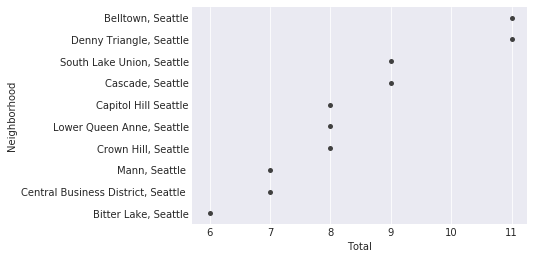

In [65]:
# swarmplot of category total and top 10 neighborhoods in Seattle
sns.swarmplot(x=top10[:10]["Total"], y=top10[:10]["Neighborhood"], data=top10, color=".25")

### Dog Friendly Categories

In this section I decided to create a boxplot to analyze our final results of the Dog Friendly Categories. The minimum value of the boxplot for the Dog Run category is 0 and has the greatest outlier with 7. This points to some neighborhoods that had none and 1 neighborhood that had 7 Dog Run locations within a 500 meter radius. From this one could recommend Denny Triangle to someone who has an active dog. The minimum for the rest of the category was 1 and only 1 other outlier for the Pet Service category which was 4 in the Crown Hill neighborhood which has the most Pet Services available. With this boxplot you can see the median observation line is 2 which is another way of saying on average a neighborhood in the top ten can be expected to have around 2 locations within a 500 meter radius of each category. The maxium observation is at 4 for the Dog Run and Pet Store category. The Pet Store and Veterinarian category has a maxium observation of 3. You should consider it unlikely to find a dog friendly neighborhood in Seattle with more than 4 of each category. I started with 116 neighborhoods and found 6 that contained at least 1 or more of the 4 categories within a 500 meter radius. Just 5% of neighborhoods in Seattle are dog friendly accroding to our criteria.

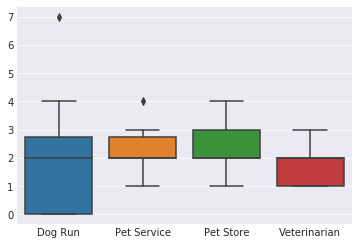

In [78]:
# Boxplot
sns.boxplot(data=top10_df[0:10])

### Top 10 Most Dog Friendly Neighborhoods in Seattle

In this section I decided to create a horizontal bar chart to analyze the final results of the Top 10 Dog Friendly Neighborhoods in Seattle. I noticed that Belltown and the Denny Triangle neighborhoods had the largest concentration of dog friendly neighborhoods in Seattle from initial observation. The analysis of the data supports the initial observation. Several neighborhoods are tied for 2nd and 3rd place. You can see from the horizontal bar chart that Capitol Hill, Lower Queen Anne and Crown Hill have a total of 8 of the 4 categories. This is fine to analyze totals but it would not let us know that Crown Hill for example does not contain all 4 of the categories as it does not have a dog run. To understand this total I refer back to the top 10 matrix.

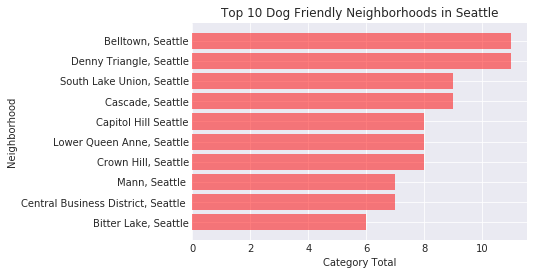

In [73]:
# horizontal bar chart
bar_label = top10[:10]['Total']
# background color         
plt.style.use('seaborn-darkgrid')
# data and bar color
fig, ax = plt.subplots()
ax.barh(top10[:10]['Neighborhood'], top10[:10]['Total'],align='center', alpha=0.5, color='r')
# labels
labels = ax.get_xticklabels()
ax.set(xlabel='Category Total')
ax.set(ylabel='Neighborhood')
ax.set(title='Top 10 Dog Friendly Neighborhoods in Seattle')
# invert axis from high to low
ax.invert_yaxis()

In [82]:
final_df = concat_df.merge(top10, on = 'Neighborhood', how = 'left').sort_values('Total', ascending=False)
final_df.reset_index(drop=True, inplace=True)
final_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Dog Run,Pet Service,Pet Store,Veterinarian,Total,1,2,3,4
0,"Denny Triangle, Seattle",47.618541,-122.338653,The Fishbowl,47.620194,-122.334624,Pet Store,7,1,2,1,11,X,X,X,X
1,"Denny Triangle, Seattle",47.618541,-122.338653,Dog Park,47.614735,-122.338260,Dog Run,7,1,2,1,11,X,X,X,X
2,"Belltown, Seattle",47.613231,-122.345361,Mudbay,47.610492,-122.341903,Pet Service,4,2,3,2,11,X,X,X,X
3,"Belltown, Seattle",47.613231,-122.345361,Rover,47.614429,-122.342567,Pet Service,4,2,3,2,11,X,X,X,X
4,"Denny Triangle, Seattle",47.618541,-122.338653,Amazon Doppler Dog Run,47.614773,-122.337879,Dog Run,7,1,2,1,11,X,X,X,X
5,"Denny Triangle, Seattle",47.618541,-122.338653,Day 1 Dog Park,47.615535,-122.339813,Dog Run,7,1,2,1,11,X,X,X,X
6,"Belltown, Seattle",47.613231,-122.345361,second leash on life,47.613847,-122.343948,Pet Store,4,2,3,2,11,X,X,X,X
7,"Denny Triangle, Seattle",47.618541,-122.338653,The Barking Lounge,47.620324,-122.341826,Pet Service,7,1,2,1,11,X,X,X,X
8,"Denny Triangle, Seattle",47.618541,-122.338653,Urban Animal,47.616300,-122.341315,Veterinarian,7,1,2,1,11,X,X,X,X
9,"Belltown, Seattle",47.613231,-122.345361,Third & Stewart Animal Wellness,47.611993,-122.340640,Veterinarian,4,2,3,2,11,X,X,X,X


In [83]:
final_map = final_df.groupby('Neighborhood').mean().sort_values('Total', ascending=False)
final_map.reset_index(drop=True, inplace=True)
final_map[:10]

,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Dog Run,Pet Service,Pet Store,Veterinarian,Total
0,47.613231,-122.345361,47.614131,-122.343197,4,2,3,2,11
1,47.618541,-122.338653,47.617912,-122.338220,7,1,2,1,11
2,47.623161,-122.338382,47.621759,-122.338086,2,3,3,1,9
3,47.620241,-122.333318,47.620374,-122.332843,3,2,2,2,9
4,47.623831,-122.318369,47.622221,-122.317344,2,2,2,2,8
5,47.622338,-122.355756,47.623787,-122.356664,2,3,1,2,8
6,47.694715,-122.371459,47.694678,-122.373613,0,4,2,2,8
7,47.608832,-122.337419,47.609576,-122.340505,0,2,4,1,7
8,47.609532,-122.336290,47.609576,-122.340505,0,2,4,1,7
9,47.726236,-122.348764,47.724700,-122.343162,0,2,1,3,6


### Final Map

The final map takes the latitude and longitude of the Top 10 Dog Friendly neighborhoods and assigns the category venue total number. In the map visualiazation we can see that out of 116 neighborhoods only 6 had all 4 categories and where within a 500 meter radius. This is a representation of about 5% of neighborhoods in the city of Seattle met the definition of a dog friendly neighborhood.  

In [86]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(final_map[:10]['Neighborhood Latitude'], final_map[:10]['Neighborhood Longitude'], final_map[:10]['Total']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='transparent',
        fill=True,
        fill_color='#f6ff00',
        fill_opacity=.8,
        parse_html=False).add_to(map_seattle)  
    
map_seattle

## 5. Results

The analysis shows that 6 of our Top 10 Dog Friendly neighborhoods in Seattle would be ideal for a dog owner  as each category would be available and within a 500 meter radius. This is the kind of information that would give a relocation assistance company a competitive edge over their competitors. This method and approach is scalable and can be applied beyond the city of Seattle. I am satisfied with the final results and was somewhat surprised how I was able to accurately select the top two Dog Friendly neighborhoods using the map overlay technique from just the use of the spatial data without the FourSquare API.

However, I did start to have some trouble with the map overlay technique as the category markers were more spread around. To determine which neighborhoods had all 4 categories from the map overlay would at times be hard to make out and get to the popup information. I found the zoom feature of folium to be helpful with the visual of a potential Dog Friendly neighborhood and found that zoom at 14 made it clearer which neighborhoods had the greatest potential to be in the top 5 just from observation.

The results from the data visualization uncovered an average of 2 locations per category would be within a 500 meter radius of our top 10 neighborhoods with the exception of 4 neighborhoods which would not be a good place to exercise your dog. This is important information for a dog owner to know who is going to relocate to Seattle. Now a relocation assistance company can help that dog owner out and suggest the 6 neighborhoods that we know from our study would make an ideal Dog Friendly neighborhood based on the final results of our summary table with the built in matrix.

The final map makes for a really interesting observation as you will see all but two of the neighborhoods are clustered together. A possible result of a narrow radius used to get venues from the FourSquare API. I find that 500 meters is in walking distance of most of our pet service, pet stores, dog runs and veterinarians. I think the result of an increase in our radius would increase our overlap and push more neighborhoods to meet our ideal neighborhood with all 4 categories. 

Now that I have the final results and looked over the map I can see that the central part of Seattle is more dog friendly than any other part of the city. Belltown and the area around it stands out the most on our final map. All of the information from this study should provide enough insight to help a relocation assistance company better handle the needs of a dog owner.

#### Recommendation:

Out of 116 neighborhoods in Seattle only 6 had all 4 categories within a 500 meter radius. This accounts for 5% of neighborhoods in the city of Seattle that would be considered dog friendly based on this study. I would recommend to the relcotion assistance company that the study found that central Seattle had the most concentration of dog friendly neighborhoods around the Belltown area. The relcoation company can now advise a dog owner who wants to relocate to the city of Seattle of the 6 neighborhoods listed below: 

| Neighborhood                              | Dog Run	| Pet Service	| Pet Store	| Veterinarian |
| --------------------------------------     | -------  | -----------   | --------- | ------------ |
|1. 	Belltown, Seattle                    | 4	    | 2	            | 3	        | 2            |
|2. 	Denny Triangle, Seattle              | 7	    | 1	            | 2	        | 1            |      
|3. 	South Lake Union, Seattle            | 2	    | 3	            | 3	        | 1            |
|4. 	Cascade, Seattle                     | 3	    | 2	            | 2	        | 2            |
|5. 	Capitol Hill, Seattle                | 2	    | 2	            | 2	        | 2            |
|6. 	Lower Queen Anne, Seattle            | 2	    | 3	            | 1	        | 2            |
|7. 	Crown Hill, Seattle                  | 0	    | 4	            | 2	        | 2            |
|8. 	Mann, Seattle                        | 0	    | 2	            | 4	        | 1            |
|9. 	Central Business District, Seattle   | 0	    | 2	            | 4	        | 1            |
|10.    Bitter Lake, Seattle                 | 0	    | 2	            | 1	        | 3            |


## 6. Conclusion

Purpose of this project was to identify the top 10 dog friendly neighborhoods in the city of Seattle for a relocation assistance company who would use the information to help a dog owner figure out what part of the city would accomodate their canine based on 4 category veneus (Pet Service, Pet Store, Dog Run, and Veterinarian) from the FourSquare API. The city of Seattle only has 6 neighborhoods that are within a 500 meter radius of all 4 of our categories out of 116 neighborhoods. This accounts for just 5% of all neighborhoods which be like trying to find a needle in a haystack. 

My initial idea for the study was to look for at least 10 neighborhoods that contained all 4 of the categories within a reasonable walking distance. What I discovered is that the city of Seattle had the greatest concentration in the center of our map. You can see that no neighborhoods in West and South Seattle made the list. Downtown Seattle had a good concentration of pet friendly neighborhoods which was kind of a surprise. 

I am a dog owner and have avoided offers to relocate to Seattle and Philadelphia because I felt that they would not be dog friendly. This study really helped to change that perspective and I could see a company like Amazon or Microsoft using a relocation assistance company to garner this kind of information to help a candidate make a decision to relocate to Seattle for a job. When I think about the potential use of the study from this project I start to wonder about power and value of data. All companies can really beneift from a data science practice that is data driven.   

With this study a relocation assistance company can now offer a Dog Friendly city matrix to a dog owner for other cities. I would recommend some additional work to the relocation assistance company to transform the information from this project into a more comprehensive 360 degree dashboard that a customer could access from the company website. The study can certainly be more scalable to offer information on the best neighborhoods to move to with your dog in other cities.

In conclusion this project was able to identity 6 dog friendly neighborhoods in Seattle with all 4 categories. From this study I would be able to recommend these neighborhoods based on the data collected and the analysis conducted. I would let the relocation assistance company know that the restriction to the radius of 500 meters is a factor in the results of the study. I surmise that an increase in the radius should result in an increase in neighborhoods with all 4 categories. The percentage of neighborhoods should increase with the radius. In closing I would point out that the data from the FourSquare API is not static, to provide the most accurate information to the relocation assistance company a person will need to maintain and refresh the code.       